<a href="https://colab.research.google.com/github/juancuevas-ops/inteligencia-artificial/blob/main/Algoritmo_prediccion_de_fraudes_juan_cuevas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn

import pandas as pd
import numpy as np
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE




In [2]:
df = pd.read_csv("/content/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,116942.000000,116942.000000,116942.000000,116942.000000,116942.000000,116942.000000,116942.000000,116941.000000,116941.000000,116941.000000,...,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000,116941.000000
mean,46555.919858,-0.254372,-0.011079,0.679823,0.155177,-0.283503,0.091362,-0.115035,0.059857,-0.072416,...,-0.034690,-0.112270,-0.035781,0.011250,0.131767,0.026812,0.000909,0.002134,94.638640,0.002087
std,18692.683683,1.837763,1.633274,1.296662,1.335851,1.333416,1.293633,1.193083,1.226684,1.097922,...,0.734001,0.638304,0.613066,0.595049,0.438905,0.491057,0.389929,0.315736,256.345117,0.045631
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,35373.000000,-1.021560,-0.586654,0.174900,-0.705556,-0.904684,-0.651636,-0.602491,-0.133967,-0.703675,...,-0.225258,-0.540312,-0.174906,-0.324405,-0.132893,-0.323244,-0.060893,-0.004644,6.930000,0.000000
50%,48402.000000,-0.263961,0.087372,0.754080,0.182479,-0.316101,-0.161610,-0.067533,0.077845,-0.136354,...,-0.058329,-0.089914,-0.048198,0.067293,0.168806,-0.065406,0.010766,0.023429,25.000000,0.000000
75%,61799.000000,1.155504,0.752744,1.376219,1.014715,0.243386,0.482518,0.411126,0.370001,0.512976,...,0.117733,0.307717,0.081818,0.408435,0.419662,0.292430,0.084841,0.077188,85.100000,0.000000
max,74484.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [7]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Time[df.Class == 0].describe())

Fraud
count      244.000000
mean     39556.676230
std      19375.347132
min        406.000000
25%      26248.750000
50%      41235.000000
75%      55844.500000
max      74262.000000
Name: Time, dtype: float64

Normal
count    116697.000000
mean      46570.315149
std       18688.471677
min           0.000000
25%       35385.000000
50%       48424.000000
75%       61813.000000
max       74484.000000
Name: Time, dtype: float64


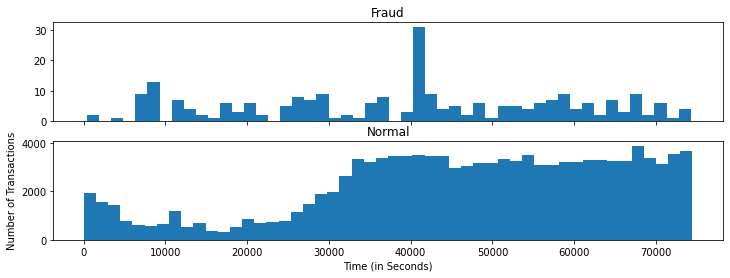

In [8]:
#actaulizacion de algoritmo
import matplotlib.pyplot as plt
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

Now let's see if the transaction amount differs between the two types.
español:
La función 'Tiempo' se ve bastante similar en ambos tipos de transacciones. Podría argumentar que las transacciones fraudulentas se distribuyen de manera más uniforme, mientras que las transacciones normales tienen una distribución cíclica. Esto podría hacer que sea más fácil detectar una transacción fraudulenta durante un horario "fuera de las horas punta".

Ahora veamos si el monto de la transacción difiere entre los dos tipos.

In [37]:
print ("Fraud")
print (df.Amount[df.Class == 1].describe())
print ()
print ("Normal")
print (df.Amount[df.Class == 0].describe())

Fraud
count     244.000000
mean      120.047418
std       253.594749
min         0.000000
25%         1.000000
50%         9.560000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

Normal
count    116697.000000
mean         94.585514
std         256.349273
min           0.000000
25%           6.950000
50%          25.000000
75%          85.000000
max       19656.530000
Name: Amount, dtype: float64


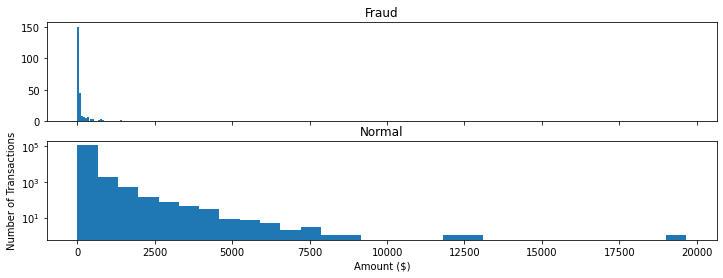

In [10]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

In [11]:
df['Amount_max_fraud'] = 1
df.loc[df.Amount <= 2125.87, 'Amount_max_fraud'] = 0

La mayoría de las transacciones son pequeñas cantidades, menos de 100.𝐹𝑟𝑎𝑢𝑑𝑢𝑙𝑒𝑛𝑡𝑡𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛𝑠ℎ𝑎𝑣𝑒𝑎𝑚𝑎𝑥𝑖𝑚𝑢𝑚𝑣𝑎𝑙𝑢𝑒𝑓𝑎𝑟𝑙𝑒𝑠𝑠𝑡ℎ𝑎𝑛𝑛𝑜𝑟𝑚𝑎𝑙𝑡𝑟𝑎𝑛𝑠𝑎𝑐𝑡𝑖𝑜𝑛𝑠, 2,125.87 frente a $ 25,691.16.

Comparemos Tiempo con Cantidad.Actualizacion by Juan Cuevas Vasquez

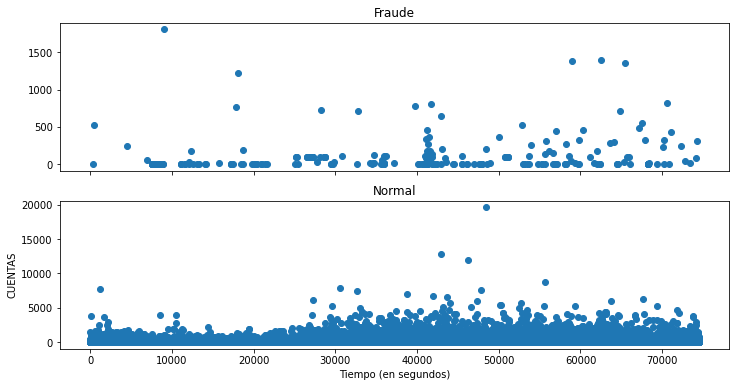

In [12]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('Normal')

plt.xlabel('Tiempo (en segundos)')
plt.ylabel('CUENTAS')
plt.show()

Nada demasiado útil aquí.

A continuación, echemos un vistazo a las características anonimizadas.

In [13]:
#Select only the anonymized features.
v_features = df.iloc[:,1:29].columns

In [14]:
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

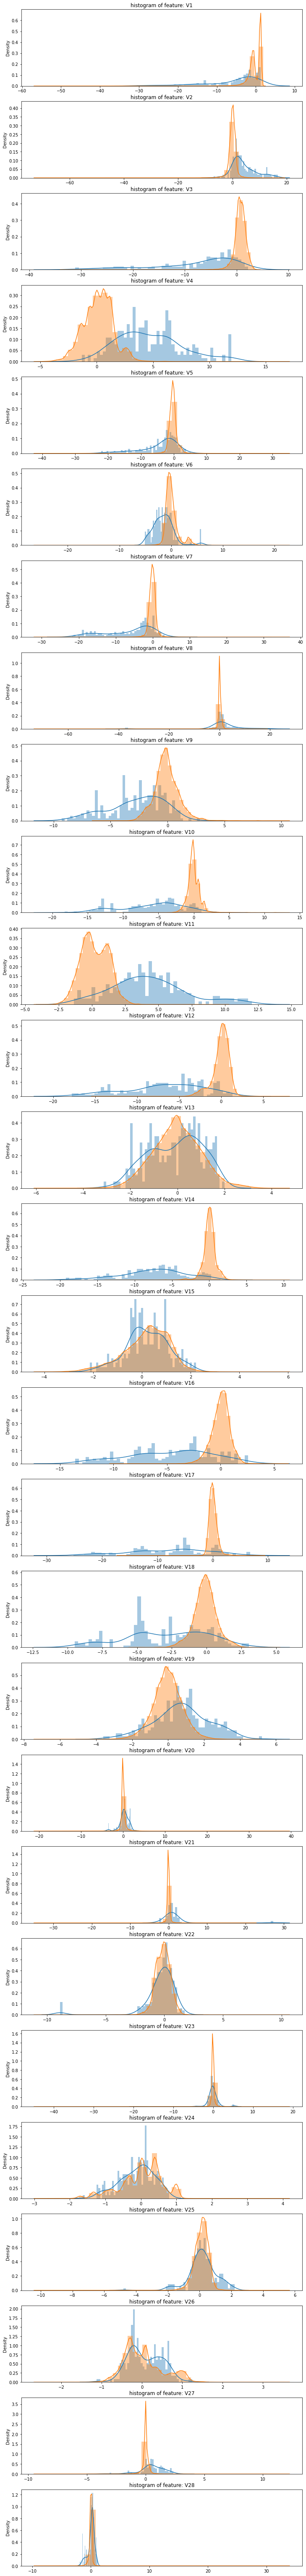

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[v_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

Eliminamos todas las características que tienen distribuciones muy similares entre los dos tipos de transacciones

#Basándose en los gráficos anteriores, estas funciones se crean para identificar valores en los que las transacciones fraudulentas son más comunes.

In [16]:
(lambda x: 1 if x < -3 else 0)
df['V2_'] = df.V2.map(lambda x: 1 if x > 2.5 else 0)
df['V3_'] = df.V3.map(lambda x: 1 if x < -4 else 0)
df['V4_'] = df.V4.map(lambda x: 1 if x > 2.5 else 0)
df['V5_'] = df.V5.map(lambda x: 1 if x < -4.5 else 0)
df['V6_'] = df.V6.map(lambda x: 1 if x < -2.5 else 0)
df['V7_'] = df.V7.map(lambda x: 1 if x < -3 else 0)
df['V9_'] = df.V9.map(lambda x: 1 if x < -2 else 0)
df['V10_'] = df.V10.map(lambda x: 1 if x < -2.5 else 0)
df['V11_'] = df.V11.map(lambda x: 1 if x > 2 else 0)
df['V12_'] = df.V12.map(lambda x: 1 if x < -2 else 0)
df['V14_'] = df.V14.map(lambda x: 1 if x < -2.5 else 0)
df['V16_'] = df.V16.map(lambda x: 1 if x < -2 else 0)
df['V17_'] = df.V17.map(lambda x: 1 if x < -2 else 0)
df['V18_'] = df.V18.map(lambda x: 1 if x < -2 else 0)
df['V19_'] = df.V19.map(lambda x: 1 if x > 1.5 else 0)
df['V21_'] = df.V21.map(lambda x: 1 if x > 0.6 else 0)

#Crearemos una nueva función para transacciones normales (no fraudulentas)

In [17]:
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [18]:
df.loc[df.Class == 0, 'Normal'] = 1
df.loc[df.Class == 1, 'Normal'] = 0

In [28]:
#492 fraudulent transactions, 284,315 normal transactions.
#0.172% of transactions were fraud. 
print(df.Normal.value_counts())
print()
print(df.Amount_max_fraud.value_counts())

1.0    116697
0.0       244
Name: Normal, dtype: int64

0    116670
1       272
Name: Amount_max_fraud, dtype: int64


In [29]:
import pandas as pd
pd.set_option("display.max_columns",101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_max_fraud,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,Normal
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [30]:
pd.set_option("display.max_columns",101)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_max_fraud,V2_,V3_,V4_,V5_,V6_,V7_,V9_,V10_,V11_,V12_,V14_,V16_,V17_,V18_,V19_,V21_,Normal
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


In [43]:
#Create dataframes of only Fraud and Normal transactions.
Fraud = df[df.Class == 1]
Normal = df[df.Normal == 1]


In [44]:
# Set X_train equal to 80% of the fraudulent transactions.
X_train = Fraud.sample(frac=0.8)
count_Frauds = len(X_train)

# Add 80% of the normal transactions to X_train.
X_train = pd.concat([X_train, Normal.sample(frac = 0.8)], axis = 0)

# X_test contains all the transaction not in X_train.
X_test = df.loc[~df.index.isin(X_train.index)]

In [45]:
#Shuffle the dataframes so that the training is done in a random order.
X_train = shuffle(X_train)
X_test = shuffle(X_test)

In [46]:
#Add our target features to y_train and y_test.
y_train = X_train.Class
y_train = pd.concat([y_train, X_train.Normal], axis=1)

y_test = X_test.Class
y_test = pd.concat([y_test, X_test.Normal], axis=1)

In [48]:
#Eliminamos las funciones de destino de X_train y X_test.
X_train = X_train.drop(['Class','Normal'], axis = 1)
X_test = X_test.drop(['Class','Normal'], axis = 1)

In [54]:
#Check to ensure all of the training/testing dataframes are of the correct length
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

93553
93553
23389
23389
